# ECSE556 - HW1

## Preprocessing data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
np.random.seed(0)

In [43]:
data_path = os.path.join("TG_LASSO_GeneExpressionInput", "gdsc_expr_postCB.csv")
data = pd.read_csv(data_path, index_col=0, header=0)
data.head()

,906877,906798,906872,906873,906870,906871,906793,906792,906791,1330933,...,907317,907318,907319,1299059,684059,684052,684057,687807,684055,1322213
ENSG00000000003,2.508729,7.037164,2.577397,7.045888,4.543037,6.801862,5.300144,5.933979,6.911063,2.613291,...,6.883014,7.880665,7.088381,7.437321,7.009003,6.127656,6.923300,6.758779,7.313623,4.855711
ENSG00000000419,8.968814,9.032526,8.567381,8.617857,7.873480,8.888909,8.892322,7.913833,7.615324,7.769731,...,9.029970,9.084141,8.425315,7.433776,7.935236,8.072725,8.172654,7.131534,8.147621,8.349442
ENSG00000000457,4.432231,2.931877,2.560122,2.654424,3.753498,3.204206,3.757574,3.268314,3.680308,3.584446,...,3.180330,2.901296,2.350121,3.739198,2.957672,3.114235,3.774264,2.935753,3.586686,2.808046
ENSG00000000460,3.887446,1.713152,2.167990,2.196951,2.760429,2.628319,2.443053,2.804103,3.997609,2.491433,...,2.214473,1.844454,1.831997,2.325919,2.352136,2.605327,2.839715,3.004388,2.100455,2.297867
ENSG00000000938,2.575608,2.447280,2.777488,2.439445,2.762941,2.919733,2.570636,2.595269,2.643118,2.713652,...,2.525579,2.739947,2.493749,2.523586,2.359968,2.377841,2.427464,2.811448,2.618779,2.584757


In [44]:
data.shape

(13941, 979)

We transpose the dataframe because the standard is to have the columns be the features and the rows the samples.

In [45]:
df = data.transpose()
df.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000261685,ENSG00000261701,ENSG00000261857,ENSG00000263002,ENSG00000263843,ENSG00000264247,ENSG00000264575,ENSG00000265298,ENSG00000265929,ENSG00000266282
906877,2.508729,8.968814,4.432231,3.887446,2.575608,2.586929,5.154627,5.475647,3.211070,2.912748,...,1.484100,1.364339,2.065464,1.887633,2.820525,4.130071,1.433686,7.758634,5.598889,6.081642
906798,7.037164,9.032526,2.931877,1.713152,2.447280,8.277736,6.747967,5.465632,4.995557,2.729889,...,2.399529,0.383567,1.638664,2.924881,1.702484,3.009300,3.261519,5.199038,1.164300,5.581635
906872,2.577397,8.567381,2.560122,2.167990,2.777488,6.430931,6.566853,3.708243,4.132845,1.819089,...,1.966760,0.121532,2.978170,4.424899,1.832430,3.041152,4.051381,6.752677,1.036525,7.312342
906873,7.045888,8.617857,2.654424,2.196951,2.439445,4.854298,7.039492,2.479791,4.044124,1.805946,...,1.496517,0.593483,1.613982,3.335999,2.179198,2.699835,3.245175,6.719169,1.108325,5.444833
906870,4.543037,7.873480,3.753498,2.760429,2.762941,2.587265,2.937735,4.397153,4.741584,1.452968,...,1.823126,2.084164,1.851725,2.669694,2.238795,2.507146,2.271928,5.988098,1.476228,4.487966


In [46]:
df.shape

(979, 13941)

We split the dataset into training and evaluation, to avoid data leakage and biases.

In [47]:
# split the dataset
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=0)
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)
print(f"Shape of training set: {train.shape}")
print(f"Shape of test set: {test.shape}")

Shape of training set: (783, 13941)
Shape of test set: (196, 13941)


We scale the dataset.

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_train)

## Dimensionality Reduction

### PCA

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=2)
np_pca_projected = pca.fit_transform(df_scaled)

In [51]:
np_pca_projected.shape

(783, 2)

/Users/rbazin/.pyenv/versions/3.11.4/envs/ecsehw1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/.pyenv/versions/3.11.4/envs/ecsehw1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'PCA dimensionality reduction')

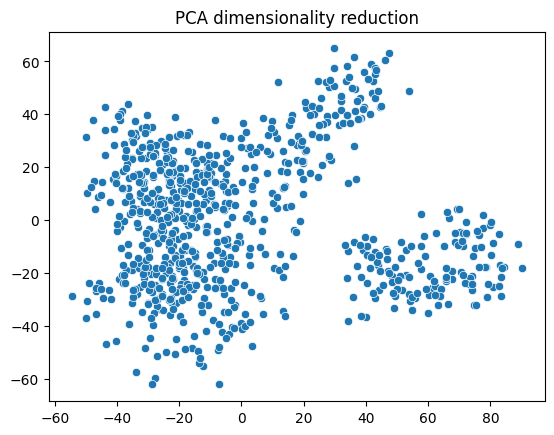

In [52]:
sns.scatterplot(x=np_pca_projected[:,0], y=np_pca_projected[:,1])
plt.title("PCA dimensionality reduction")

### t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=2000, random_state=0)
np_tsne_projected = tsne.fit_transform(df_scaled)

In [ ]:
np_tsne_projected.shape

(783, 2)

/Users/rbazin/.pyenv/versions/3.11.4/envs/ecsehw1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/.pyenv/versions/3.11.4/envs/ecsehw1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 't-SNE dimensionality reduction')

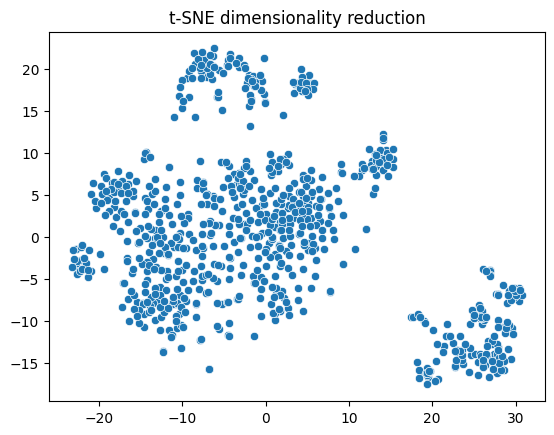

In [ ]:
sns.scatterplot(x=np_tsne_projected[:,0], y=np_tsne_projected[:,1])
plt.title("t-SNE dimensionality reduction")

### UMAP

In [53]:
from umap import UMAP

In [54]:
np_umap_projected = UMAP().fit_transform(df_scaled)

In [55]:
np_umap_projected.shape

(783, 2)

/Users/rbazin/.pyenv/versions/3.11.4/envs/ecsehw1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/.pyenv/versions/3.11.4/envs/ecsehw1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'UMAP dimensionality reduction')

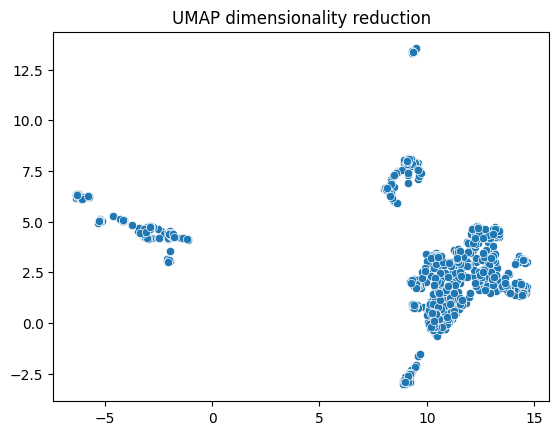

In [56]:
sns.scatterplot(x=np_umap_projected[:,0], y=np_umap_projected[:,1])
plt.title("UMAP dimensionality reduction")

### All together

/Users/rbazin/.pyenv/versions/3.11.4/envs/ecsehw1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/.pyenv/versions/3.11.4/envs/ecsehw1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/.pyenv/versions/3.11.4/envs/ecsehw1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rbazin/.pyenv/versions/3.11.4/envs/ecsehw1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_c

Text(0.5, 1.0, 't-SNE dimensionality reduction')

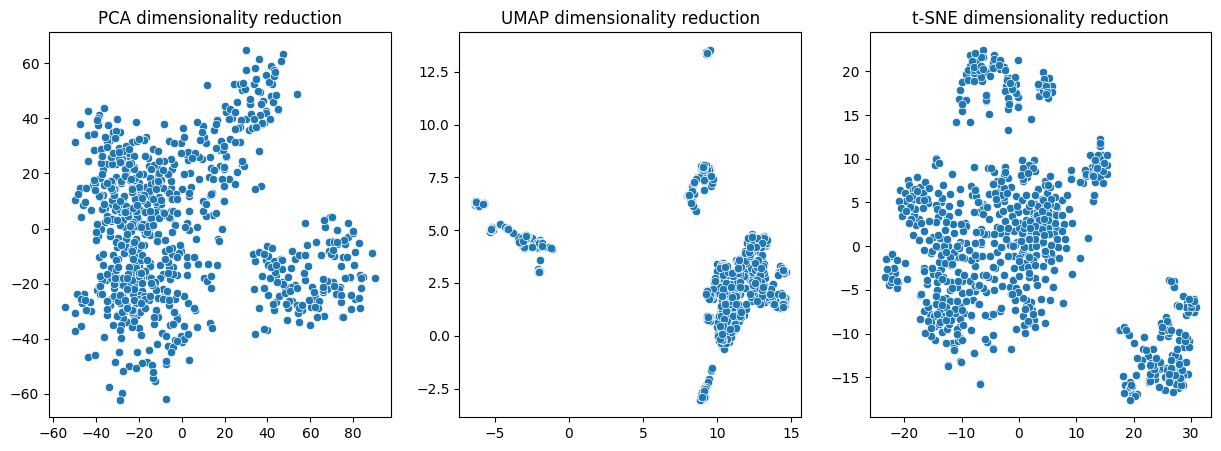

In [74]:
# make a subplot with the three plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=np_pca_projected[:,0], y=np_pca_projected[:,1], ax=axes[0])
axes[0].set_title("PCA dimensionality reduction")

sns.scatterplot(x=np_umap_projected[:,0], y=np_umap_projected[:,1], ax=axes[1])
axes[1].set_title("UMAP dimensionality reduction")

sns.scatterplot(x=np_tsne_projected[:,0], y=np_tsne_projected[:,1], ax=axes[2])
axes[2].set_title("t-SNE dimensionality reduction")

We observe that the three methods produce very different representations of the input features.